# **Importing Modules and Libraries**

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# **Importing Datasets**

In [2]:
#data = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15.csv')
data = pd.read_csv('datasets/UNSW_NB15_whole.csv')

In [3]:
data.head(n=5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

In [5]:
data['service'] = data['service'].astype(str).str.strip()
data[data['service'] == '-']

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257457,0.653375,tcp,-,FIN,10,8,564,354,26.018748,254,...,1,1,0,0,0,18,1,0,Reconnaissance,1
257511,0.695566,tcp,-,FIN,10,8,564,354,24.440528,254,...,1,1,0,0,0,3,1,0,Reconnaissance,1
257523,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,62,...,1,1,0,0,0,1,1,0,Exploits,1
257609,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,62,...,1,1,0,0,0,2,1,0,Exploits,1


In [6]:
data['service'].replace('-',np.nan,inplace=True)

C:\Users\mande\AppData\Local\Temp\ipykernel_20096\1851727398.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['service'].replace('-',np.nan,inplace=True)


In [7]:
data.isnull().sum()

dur                       0
proto                     0
service              141321
state                     0
spkts                     0
dpkts                     0
sbytes                    0
dbytes                    0
rate                      0
sttl                      0
dttl                      0
sload                     0
dload                     0
sloss                     0
dloss                     0
sinpkt                    0
dinpkt                    0
sjit                      0
djit                      0
swin                      0
stcpb                     0
dtcpb                     0
dwin                      0
tcprtt                    0
synack                    0
ackdat                    0
smean                     0
dmean                     0
trans_depth               0
response_body_len         0
ct_srv_src                0
ct_state_ttl              0
ct_dst_ltm                0
ct_src_dport_ltm          0
ct_dst_sport_ltm          0
ct_dst_src_ltm      

In [8]:
data.shape

(257673, 44)

In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(116352, 44)

In [11]:
data['attack_cat'].value_counts()

attack_cat
Generic           57956
Normal            29113
Exploits          21480
DoS                2508
Fuzzers            2266
Reconnaissance     2207
Analysis            564
Worms               148
Backdoor            110
Name: count, dtype: int64

In [12]:
data['state'].value_counts()

state
INT    57894
FIN    47350
CON    10859
REQ      234
RST       14
ACC        1
Name: count, dtype: int64

In [13]:
data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
35,0.983874,tcp,http,FIN,10,8,816,1172,17.278635,62,...,1,2,0,0,1,1,3,0,Normal,0
40,1.535254,tcp,http,FIN,10,10,826,1266,12.375802,62,...,1,2,0,0,1,1,3,0,Normal,0
45,1.059359,tcp,http,FIN,10,8,830,1134,16.047441,62,...,1,1,0,0,1,3,1,0,Normal,0
49,0.990548,tcp,http,FIN,10,10,804,1414,19.181301,62,...,1,2,0,0,1,1,2,0,Normal,0
72,1.303518,tcp,http,FIN,12,8,898,1120,14.575939,62,...,1,1,0,0,1,2,1,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257667,0.000006,udp,dns,INT,2,0,114,0,166666.660800,254,...,17,45,0,0,0,33,45,0,Generic,1
257668,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
257670,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
257671,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


In [14]:
#features = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15_features.csv')
features = pd.read_csv('datasets/UNSW_NB15_features.csv')

In [15]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [16]:
features['Type '] = features['Type '].str.lower()

In [17]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [18]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [19]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(data[c])

In [20]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])

In [21]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(data[c])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116352 entries, 35 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                116352 non-null  float64
 1   proto              116352 non-null  object 
 2   service            116352 non-null  object 
 3   state              116352 non-null  object 
 4   spkts              116352 non-null  int64  
 5   dpkts              116352 non-null  int64  
 6   sbytes             116352 non-null  int64  
 7   dbytes             116352 non-null  int64  
 8   rate               116352 non-null  float64
 9   sttl               116352 non-null  int64  
 10  dttl               116352 non-null  int64  
 11  sload              116352 non-null  float64
 12  dload              116352 non-null  float64
 13  sloss              116352 non-null  int64  
 14  dloss              116352 non-null  int64  
 15  sinpkt             116352 non-null  float64
 16  dinpkt

In [23]:
data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
35,0.983874,tcp,http,FIN,10,8,816,1172,17.278635,62,...,1,2,0,0,1,1,3,0,Normal,0
40,1.535254,tcp,http,FIN,10,10,826,1266,12.375802,62,...,1,2,0,0,1,1,3,0,Normal,0
45,1.059359,tcp,http,FIN,10,8,830,1134,16.047441,62,...,1,1,0,0,1,3,1,0,Normal,0
49,0.990548,tcp,http,FIN,10,10,804,1414,19.181301,62,...,1,2,0,0,1,1,2,0,Normal,0
72,1.303518,tcp,http,FIN,12,8,898,1120,14.575939,62,...,1,1,0,0,1,2,1,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257667,0.000006,udp,dns,INT,2,0,114,0,166666.660800,254,...,17,45,0,0,0,33,45,0,Generic,1
257668,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
257670,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
257671,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


# **Data Visualization**

## **Binary Classification**

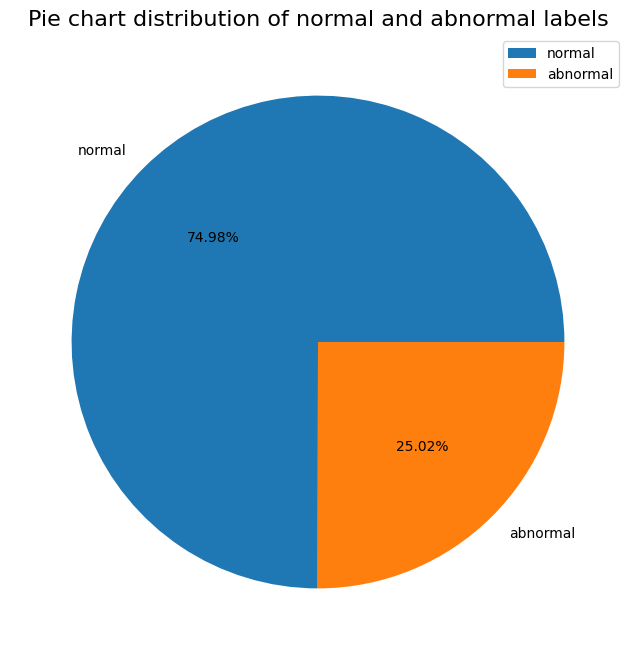

In [24]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('plots/Pie_chart_binary.png')
plt.show()

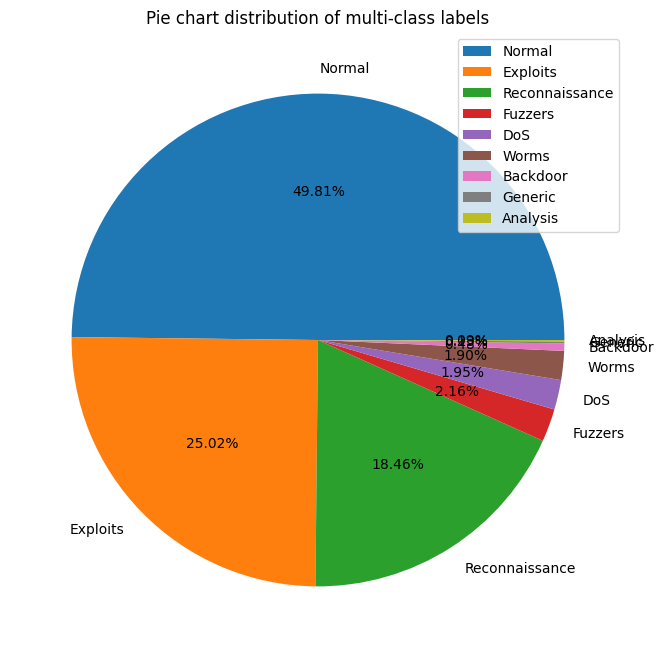

In [25]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.savefig('plots/Pie_chart_multi.png')
plt.show()

In [26]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [27]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
35,tcp,http,FIN
40,tcp,http,FIN
45,tcp,http,FIN
49,tcp,http,FIN
72,tcp,http,FIN


In [28]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [29]:
data.shape

(116352, 44)

In [30]:
data = pd.concat([data, data_cat],axis=1)

In [31]:
data.shape

(116352, 64)

In [32]:
data.drop(columns=cat_col,inplace=True)

In [33]:
data.shape

(116352, 61)

## **label encoding and class distribution visualization**

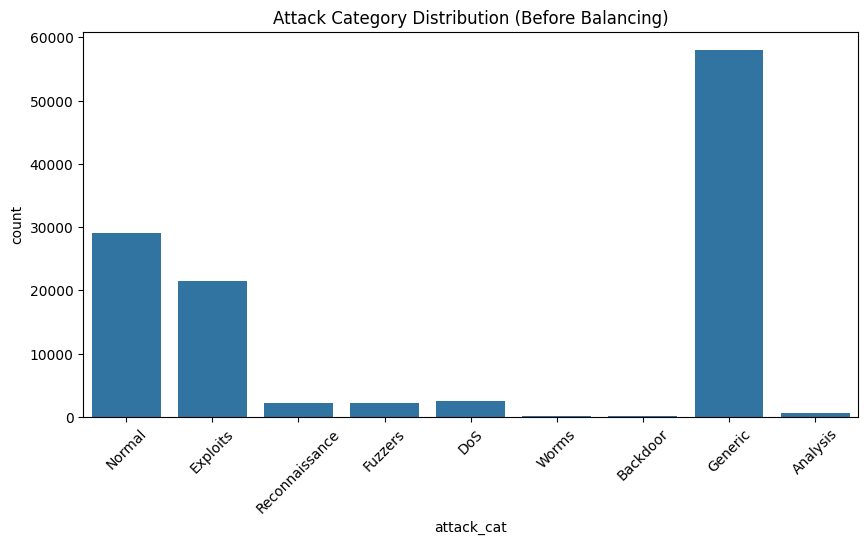

In [34]:
# Encode categorical labels
le = LabelEncoder()
data['label_encoded'] = le.fit_transform(data['attack_cat'])

# Check class distribution
plt.figure(figsize=(10,5))
sns.countplot(x='attack_cat', data=data)
plt.title("Attack Category Distribution (Before Balancing)")
plt.xticks(rotation=45)
plt.show()

# Features and labels
X = data.drop(['attack_cat', 'label_encoded'], axis=1)
y = data['label_encoded']


In [40]:
# Install if needed
# !pip install imbalanced-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek


# ---------------------------------------------------
# ✅ 2. Prepare Features & MULTICLASS Target
# ---------------------------------------------------
X = data.drop(["label", "attack_cat"], axis=1)     # remove BOTH target columns
y = data["attack_cat"]                             # multiclass target

# ---------------------------------------------------
# ✅ 3. Encode attack categories (string → integer)
# ---------------------------------------------------
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)

print("✅ Class Mapping:")
print(dict(zip(le.classes_, le.transform(le.classes_))))

# ---------------------------------------------------
# ✅ 4. One-hot encode categorical feature columns
# ---------------------------------------------------
cat_cols = X.select_dtypes(include=["object"]).columns
X_enc = pd.get_dummies(X, columns=cat_cols)

# ---------------------------------------------------
# ✅ 5. Train-test split BEFORE SMOTE+Tomek (very important)
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)




✅ Class Mapping:
{'Analysis': 0, 'Backdoor': 1, 'DoS': 2, 'Exploits': 3, 'Fuzzers': 4, 'Generic': 5, 'Normal': 6, 'Reconnaissance': 7, 'Worms': 8}


In [42]:
# ---------------------------------------------------
# ✅ 6. Apply SMOTE + Tomek Links for MULTICLASS
# ---------------------------------------------------
smote_tomek = SMOTETomek(random_state=42)

X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train, y_train)

print("\n✅ Before Balancing:")
print(pd.Series(y_train).value_counts())

print("\n✅ After SMOTE + Tomek Links:")
print(pd.Series(y_train_bal).value_counts())

# ---------------------------------------------------
# ✅ 7. Scale numeric features
# ---------------------------------------------------
num_cols = X.select_dtypes(exclude=["object"]).columns  # original numeric cols

scaler = StandardScaler()
X_train_bal[num_cols] = scaler.fit_transform(X_train_bal[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("\n✅ Dataset Ready for Multiclass Classification!")
print("Balanced Train Shape:", X_train_bal.shape)
print("Original Test Shape:", X_test.shape)


✅ Before Balancing:
5    46365
6    23290
3    17184
2     2006
4     1813
7     1766
0      451
8      118
1       88
Name: count, dtype: int64

✅ After SMOTE + Tomek Links:
5    46159
1    44530
8    44305
0    44099
6    43251
4    41682
7    40906
2    40724
3    39913
Name: count, dtype: int64

✅ Dataset Ready for Multiclass Classification!
Balanced Train Shape: (385569, 59)
Original Test Shape: (23271, 59)


In [70]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pandas as pd

# ---------------------------------------------------
# ✅ 1. Train Random Forest on SMOTE+Tomek balanced data
# ---------------------------------------------------
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',   # handles class imbalance internally too
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_bal, y_train_bal)

# ---------------------------------------------------
# ✅ 2. Make Predictions
# ---------------------------------------------------
rf_pred = rf.predict(X_test)

# ---------------------------------------------------
# ✅ 3. Evaluate Model
# ---------------------------------------------------
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred, average='weighted')  # weighted for multiclass
recall = recall_score(y_test, rf_pred, average='weighted')
f1 = f1_score(y_test, rf_pred, average='weighted')

print("\n✅ RANDOM FOREST (Multiclass) — Results")
print("--------------------------------------------------")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, rf_pred, target_names=le.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_pred))



✅ RANDOM FOREST (Multiclass) — Results
--------------------------------------------------
Accuracy : 0.9279
Precision: 0.9439
Recall   : 0.9279
F1 Score : 0.9334

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.30      0.71      0.42       113
      Backdoor       0.44      0.36      0.40        22
           DoS       0.42      0.48      0.45       502
      Exploits       0.90      0.83      0.86      4296
       Fuzzers       0.64      0.91      0.75       453
       Generic       1.00      0.99      0.99     11591
        Normal       0.98      0.93      0.96      5823
Reconnaissance       0.48      0.87      0.62       441
         Worms       0.36      0.57      0.44        30

      accuracy                           0.93     23271
     macro avg       0.61      0.74      0.66     23271
  weighted avg       0.94      0.93      0.93     23271


Confusion Matrix:
[[   80     0     4     2     1     0    25     1     0]
 [    

In [71]:
# Install XGBoost if needed
# !pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pandas as pd

# ---------------------------------------------------
# ✅ 1. Initialize Multiclass XGBoost Model
# ---------------------------------------------------
xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',    # ✅ Multiclass classification
    num_class=len(set(y_train_bal)),  # ✅ Automatically detect number of classes
    random_state=42,
    n_jobs=-1
)

# ---------------------------------------------------
# ✅ 2. Train the Model
# ---------------------------------------------------
xgb.fit(X_train_bal, y_train_bal)

# ---------------------------------------------------
# ✅ 3. Make Predictions
# ---------------------------------------------------
xgb_pred = xgb.predict(X_test)

# ---------------------------------------------------
# ✅ 4. Evaluate Model Performance
# ---------------------------------------------------
accuracy = accuracy_score(y_test, xgb_pred)
precision = precision_score(y_test, xgb_pred, average='weighted')
recall = recall_score(y_test, xgb_pred, average='weighted')
f1 = f1_score(y_test, xgb_pred, average='weighted')

print("\n✅ XGBoost (Multiclass) — Results")
print("--------------------------------------------------")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, xgb_pred, target_names=le.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, xgb_pred))


✅ XGBoost (Multiclass) — Results
--------------------------------------------------
Accuracy : 0.9264
Precision: 0.9422
Recall   : 0.9264
F1 Score : 0.9319

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.30      0.70      0.42       113
      Backdoor       0.29      0.36      0.32        22
           DoS       0.39      0.46      0.42       502
      Exploits       0.91      0.81      0.86      4296
       Fuzzers       0.64      0.90      0.74       453
       Generic       1.00      0.99      1.00     11591
        Normal       0.98      0.94      0.96      5823
Reconnaissance       0.49      0.85      0.62       441
         Worms       0.26      0.53      0.35        30

      accuracy                           0.93     23271
     macro avg       0.58      0.73      0.63     23271
  weighted avg       0.94      0.93      0.93     23271


Confusion Matrix:
[[   79     0     3     1     0     0    29     1     0]
 [    0     

In [72]:
from sklearn.linear_model import LogisticRegression

# ---------------------------------------------------
# ✅ Logistic Regression for Multiclass Classification
# ---------------------------------------------------
lr = LogisticRegression(
    multi_class='multinomial',   # enables softmax for multiclass
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

lr.fit(X_train_bal, y_train_bal)
lr_pred = lr.predict(X_test)

print("\n✅ Logistic Regression (Multiclass) — Results")
print("--------------------------------------------------")
print("Accuracy :", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred, average='weighted'))
print("Recall   :", recall_score(y_test, lr_pred, average='weighted'))
print("F1 Score :", f1_score(y_test, lr_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test, lr_pred, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_pred))

C:\Users\mande\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



✅ Logistic Regression (Multiclass) — Results
--------------------------------------------------
Accuracy : 0.8545829573288642
Precision: 0.9367720970486827
Recall   : 0.8545829573288642
F1 Score : 0.8824560535016701

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.10      0.96      0.19       113
      Backdoor       0.03      0.27      0.06        22
           DoS       0.23      0.32      0.27       502
      Exploits       0.91      0.58      0.71      4296
       Fuzzers       0.49      0.83      0.62       453
       Generic       1.00      0.99      0.99     11591
        Normal       0.99      0.84      0.91      5823
Reconnaissance       0.40      0.89      0.55       441
         Worms       0.05      0.83      0.10        30

      accuracy                           0.85     23271
     macro avg       0.47      0.72      0.49     23271
  weighted avg       0.94      0.85      0.88     23271


Confusion Matrix:
 [[  108 

In [73]:
from sklearn.neighbors import KNeighborsClassifier

# ---------------------------------------------------
# ✅ k-Nearest Neighbors for Multiclass Classification
# ---------------------------------------------------
knn = KNeighborsClassifier(
    n_neighbors=5,     # You can tune this
    n_jobs=-1
)

knn.fit(X_train_bal, y_train_bal)
knn_pred = knn.predict(X_test)

print("\n✅ k-Nearest Neighbors (Multiclass) — Results")
print("--------------------------------------------------")
print("Accuracy :", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred, average='weighted'))
print("Recall   :", recall_score(y_test, knn_pred, average='weighted'))
print("F1 Score :", f1_score(y_test, knn_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test, knn_pred, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, knn_pred))



✅ k-Nearest Neighbors (Multiclass) — Results
--------------------------------------------------
Accuracy : 0.8718147049976366
Precision: 0.9286171159483448
Recall   : 0.8718147049976366
F1 Score : 0.8915288077049526

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.14      0.69      0.23       113
      Backdoor       0.08      0.23      0.12        22
           DoS       0.19      0.39      0.26       502
      Exploits       0.89      0.64      0.74      4296
       Fuzzers       0.49      0.76      0.60       453
       Generic       1.00      0.99      0.99     11591
        Normal       0.98      0.88      0.93      5823
Reconnaissance       0.32      0.78      0.45       441
         Worms       0.06      0.20      0.09        30

      accuracy                           0.87     23271
     macro avg       0.46      0.62      0.49     23271
  weighted avg       0.93      0.87      0.89     23271


Confusion Matrix:
 [[   78 

In [74]:
from sklearn.tree import DecisionTreeClassifier

# ---------------------------------------------------
# ✅ Decision Tree for Multiclass Classification
# ---------------------------------------------------
dt = DecisionTreeClassifier(
    criterion='gini',     # or 'entropy'
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

dt.fit(X_train_bal, y_train_bal)
dt_pred = dt.predict(X_test)

print("\n✅ Decision Tree (Multiclass) — Results")
print("--------------------------------------------------")
print("Accuracy :", accuracy_score(y_test, dt_pred))
print("Precision:", precision_score(y_test, dt_pred, average='weighted'))
print("Recall   :", recall_score(y_test, dt_pred, average='weighted'))
print("F1 Score :", f1_score(y_test, dt_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test, dt_pred, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, dt_pred))


✅ Decision Tree (Multiclass) — Results
--------------------------------------------------
Accuracy : 0.9110480856001031
Precision: 0.927975969914946
Recall   : 0.9110480856001031
F1 Score : 0.9176180599042166

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.32      0.68      0.44       113
      Backdoor       0.16      0.41      0.23        22
           DoS       0.30      0.44      0.35       502
      Exploits       0.87      0.77      0.82      4296
       Fuzzers       0.60      0.75      0.67       453
       Generic       1.00      0.99      0.99     11591
        Normal       0.97      0.94      0.95      5823
Reconnaissance       0.46      0.67      0.55       441
         Worms       0.22      0.47      0.30        30

      accuracy                           0.91     23271
     macro avg       0.54      0.68      0.59     23271
  weighted avg       0.93      0.91      0.92     23271


Confusion Matrix:
 [[   77     0  

In [34]:
# Install if needed
# !pip install imbalanced-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek


# ---------------------------------------------------
# ✅ 2. Prepare Features & MULTICLASS Target
# ---------------------------------------------------
X = data.drop(["label", "attack_cat"], axis=1)     # remove BOTH target columns
y = data["attack_cat"]                             # multiclass target

# ---------------------------------------------------
# ✅ 3. Encode attack categories (string → integer)
# ---------------------------------------------------
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)

print("✅ Class Mapping:")
print(dict(zip(le.classes_, le.transform(le.classes_))))

# ---------------------------------------------------
# ✅ 4. One-hot encode categorical feature columns
# ---------------------------------------------------
cat_cols = X.select_dtypes(include=["object"]).columns
X_enc = pd.get_dummies(X, columns=cat_cols)

# ---------------------------------------------------
# ✅ 5. Train-test split BEFORE SMOTE+Tomek (very important)
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# ---------------------------------------------------
# ✅ 6. Apply SMOTE + Tomek Links for MULTICLASS
# ---------------------------------------------------
smote_tomek = SMOTETomek(random_state=42)

X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train, y_train)

print("\n✅ Before Balancing:")
print(pd.Series(y_train).value_counts())

print("\n✅ After SMOTE + Tomek Links:")
print(pd.Series(y_train_bal).value_counts())

# ---------------------------------------------------
# ✅ 7. Scale numeric features
# ---------------------------------------------------
num_cols = X.select_dtypes(exclude=["object"]).columns  # original numeric cols

scaler = StandardScaler()
X_train_bal[num_cols] = scaler.fit_transform(X_train_bal[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("\n✅ Dataset Ready for Multiclass Classification!")
print("Balanced Train Shape:", X_train_bal.shape)
print("Original Test Shape:", X_test.shape)


✅ Class Mapping:
{'Analysis': 0, 'Backdoor': 1, 'DoS': 2, 'Exploits': 3, 'Fuzzers': 4, 'Generic': 5, 'Normal': 6, 'Reconnaissance': 7, 'Worms': 8}

✅ Before Balancing:
5    46365
6    23290
3    17184
2     2006
4     1813
7     1766
0      451
8      118
1       88
Name: count, dtype: int64

✅ After SMOTE + Tomek Links:
5    46159
1    44530
8    44305
0    44099
6    43251
4    41682
7    40906
2    40724
3    39913
Name: count, dtype: int64

✅ Dataset Ready for Multiclass Classification!
Balanced Train Shape: (385569, 59)
Original Test Shape: (23271, 59)


In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# ---------------------------------------------------
# ✅ Random Forest Hyperparameter Search Space
# ---------------------------------------------------
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# ---------------------------------------------------
# ✅ Use Randomized Search for Speed
# ---------------------------------------------------
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,                 # number of combos to try
    scoring='f1_weighted',     # best for multiclass imbalance
    cv=2,                      # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# ---------------------------------------------------
# ✅ Train / Tune Model
# ---------------------------------------------------
rf_search.fit(X_train_bal, y_train_bal)

print("\n✅ Best Hyperparameters:")
print(rf_search.best_params_)

best_rf = rf_search.best_estimator_


Fitting 2 folds for each of 20 candidates, totalling 40 fits

✅ Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'class_weight': 'balanced'}


In [38]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

rf_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred, average='weighted')
recall = recall_score(y_test, rf_pred, average='weighted')
f1 = f1_score(y_test, rf_pred, average='weighted')

print("\n✅ RANDOM FOREST (Tuned) — Results")
print("--------------------------------------------")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, rf_pred, target_names=le.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_pred))



✅ RANDOM FOREST (Tuned) — Results
--------------------------------------------
Accuracy : 0.9253
Precision: 0.9437
Recall   : 0.9253
F1 Score : 0.9316

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.27      0.71      0.39       113
      Backdoor       0.59      0.45      0.51        22
           DoS       0.41      0.49      0.45       502
      Exploits       0.90      0.82      0.86      4296
       Fuzzers       0.62      0.93      0.75       453
       Generic       1.00      0.99      0.99     11591
        Normal       0.99      0.93      0.96      5823
Reconnaissance       0.48      0.88      0.62       441
         Worms       0.35      0.53      0.42        30

      accuracy                           0.93     23271
     macro avg       0.62      0.75      0.66     23271
  weighted avg       0.94      0.93      0.93     23271


Confusion Matrix:
[[   80     0     4     1     0     0    27     1     0]
 [    0    10    